In [235]:
import random
import datetime
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import quandl
import yfinance as yf

In [236]:
end = datetime.datetime.now()
start = (now - datetime.timedelta(days=365*4)).strftime("%Y-%m-%d")

In [237]:
ether = quandl.get('BITFINEX/ETHUSD.3',start_date= '2019-01-01',end_date=end, index_col='Date', parse_dates=True)
btc = quandl.get('BITFINEX/BTCUSD.3',start_date='2019-01-01', end_date=end, index_col='Date', parse_dates=True)
amzn = yf.Ticker("AMZN").history(start='2019-01-01', index_col='Date', parse_dates=True)
amzn = pd.DataFrame((amzn['High'] + amzn['Low'])/2, columns = ['amzn'])
aapl = yf.Ticker("AAPL").history(start='2019-01-01', index_col='Date', parse_dates=True)
aapl = pd.DataFrame((aapl['High'] + aapl['Low'])/2, columns = ['aapl'])
msft = yf.Ticker("MSFT").history(start='2019-01-01', index_col='Date', parse_dates=True)
msft = pd.DataFrame((msft['High'] + msft['Low'])/2, columns = ['msft'])


In [238]:
ether.index= ether.index.date
btc.index= btc.index.date
amzn.index= amzn.index.date
aapl.index= aapl.index.date
msft.index= msft.index.date

In [240]:
msft

,msft
2019-01-02,95.892050
2019-01-03,94.315274
2019-01-04,96.250412
2019-01-07,97.593063
2019-01-08,98.276343
...,...
2023-02-14,271.445120
2023-02-15,268.455002
2023-02-16,264.319992
2023-02-17,258.044998


In [241]:
#concating series
df = pd.concat([ether, btc, amzn, aapl,msft], axis=1)
df.columns = ['ether', 'btc', 'amzn', 'aapl', 'msft']
df.fillna(method='ffill', inplace=True)
df=df[1:-15]
df

,ether,btc,amzn,aapl,msft
2019-01-02,160.745,4061.15,75.357250,37.714573,95.892050
2019-01-04,158.990,3959.75,77.807747,35.217371,96.250412
2019-01-05,158.435,3910.95,77.807747,35.217371,96.250412
2019-01-06,160.795,4172.95,77.807747,35.217371,96.250412
2019-01-07,154.560,4112.15,80.593750,35.504076,97.593063
...,...,...,...,...,...
2023-02-14,1556.950,22216.50,99.219997,152.315002,271.445120
2023-02-15,1673.050,24301.00,99.809998,154.190002,268.455002
2023-02-16,1641.500,23671.50,99.364998,154.840004,264.319992
2023-02-17,1696.350,24592.00,96.795002,151.925003,258.044998


In [246]:
#making the same length of columns in the common dataframe and separately
ether=df['ether']
btc=df['btc']
amzn=df['amzn']
aapl=df['aapl']
msft=df['msft']

In [247]:
#logarithmic returns
log_ret = np.log(df/df.shift(1))
log_ret

,ether,btc,amzn,aapl,msft
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.010978,-0.025285,0.032001,-0.068507,0.003730
2019-01-05,-0.003497,-0.012401,0.000000,0.000000,0.000000
2019-01-06,0.014786,0.064843,0.000000,0.000000,0.000000
2019-01-07,-0.039548,-0.014677,0.035180,0.008108,0.013853
...,...,...,...,...,...
2023-02-14,0.032940,0.019178,0.009366,-0.001804,0.004604
2023-02-15,0.071920,0.089682,0.005929,0.012235,-0.011077
2023-02-16,-0.019038,-0.026246,-0.004468,0.004207,-0.015523
2023-02-17,0.032868,0.038149,-0.026205,-0.019005,-0.024026


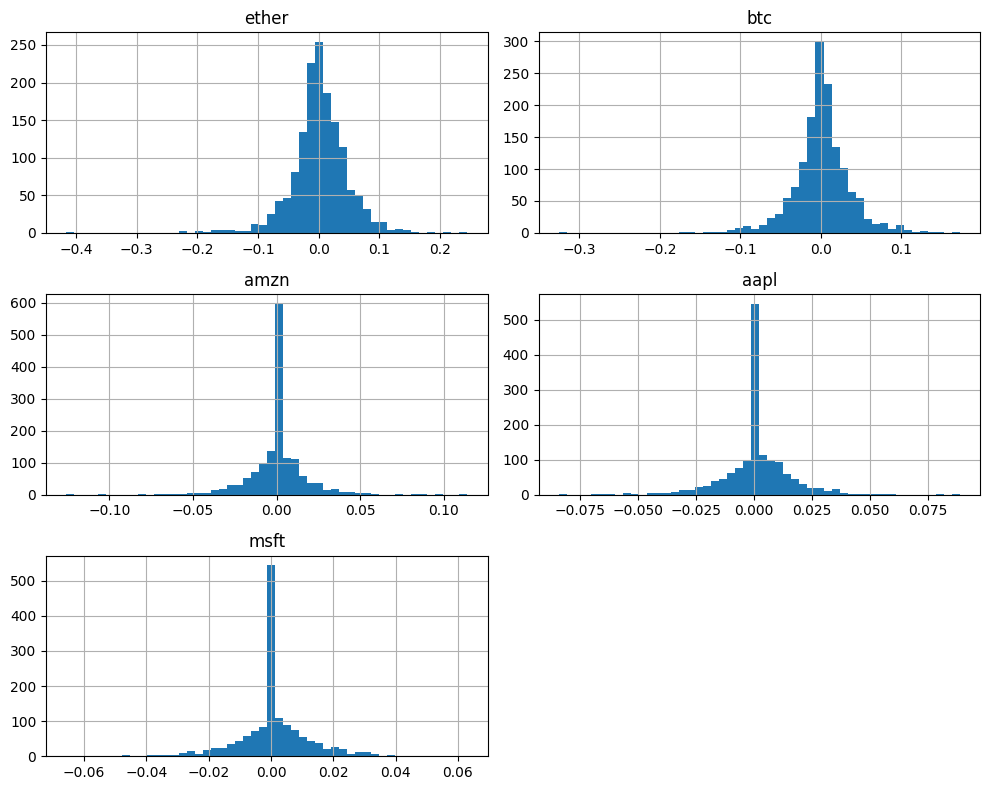

In [249]:
log_ret.hist(bins=50, figsize=(10,8))
plt.tight_layout()

In [250]:
np.random.seed(101)

num_ports = 15000
all_weights = np.zeros((num_ports, len(df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

  weights = np.array(random.random(5))
  weights = weights / np.sum(weights)

  #save weights
  all_weights[ind,:] = weights

  #expected returns
  ret_arr[ind] = np.sum((log_ret.mean() * weights) * 365)

  #expected volatility
  vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 365, weights)))

  #sharpe ratio
  sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [251]:
sharpe_arr.argmax()

12536

In [252]:
ret_arr.argmax()

5140

In [254]:
max_sr_ret = ret_arr[12536]
max_sr_vol = vol_arr[12536]

max_ret_ret = ret_arr[5140]
max_ret_vol = vol_arr[5140]


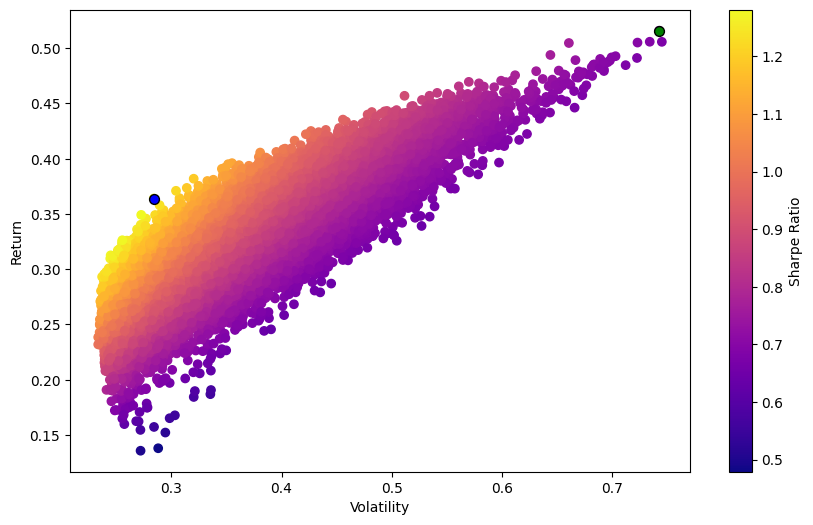

In [255]:
plt.figure(figsize=(10,6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# blue dot for max SR, green dot for max return
plt.scatter(max_sr_vol, max_sr_ret, c='blue',s=50,edgecolors='black')
plt.scatter(max_ret_vol, max_ret_ret, c='green',s=50,edgecolors='black')

In [306]:
total_yield = (np.exp(log_ret.sum()) - 1) * 100 / len(df) *365
total_yield.append()

TypeError: append() got an unexpected keyword argument 'name'

<AxesSubplot: >

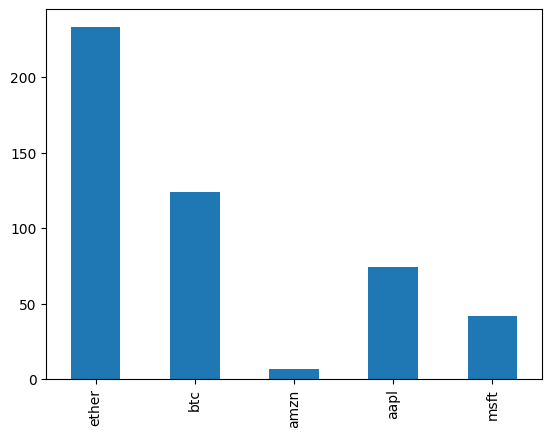

In [305]:
total_yield.plot(kind='bar')

In [274]:
all_weights[12536]

array([1.03809673e-01, 9.80265384e-02, 5.31239729e-04, 6.79762598e-01,
       1.17869951e-01])